<a href="https://colab.research.google.com/github/sashwinbwaj/Marketing-Reponse-Prediction/blob/main/Marketing_Response_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MARKETING RESPONSE PREDICTION
#### Predicting the responses of customers to a direct marketing campaign for a term deposit from a Portguese bank using a logistic regression model. The dataset was taken from UC Irvine's Machine Learning repository.  
Features:   
- age: Age   
- education: Education level
- job: Job classification
- default: Whether the customer defaulted in the past
- housing : Whether the customer has a housing loan
- loan: Whether the customer has a personal loan
- month, day_of_week, contact : Last contact type, month & day respectively
- duration: Last contact duration
- campaign: Number of contacts in this campaign
- pdays: Number of days since last contact
- previous: Number of contacts in this campaign (excluding this one)
- poutcome: Outcome of the previous call
- emp.var.rate: Employment variation rate
- cons.price.idx: Consumer price index
- cons.conf.idx- Consumer confidence index
- euribor3m: Euribor rate (Last 3M)

#### LOADING & PRE-PROCESSING THE DATASET

In [6]:
# Importing essential modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


import seaborn as sns
sns.set_style('dark')

# Importing the banking dataset
banking = pd.read_csv("banking.csv")
banking = banking.rename(columns = {"y":"target"})
banking.shape


(41188, 21)

In [7]:
# Glimpse of the data structure
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [8]:
# Checking for missing values
banking_na = banking[banking.isna().any(axis = 1)]
banking_na.shape

(0, 21)

In [9]:
# Grouping education levels
banking['education'] = np.where(banking['education'] == 'basic.9y', 'Basic', banking['education'])
banking['education'] = np.where(banking['education'] == 'basic.6y', 'Basic', banking['education'])
banking['education'] = np.where(banking['education'] == 'basic.4y', 'Basic', banking['education'])


#### EXPLORATORY DATA ANALYSIS

In [10]:
np.unique(banking.education, return_counts = True)

(array(['Basic', 'high.school', 'illiterate', 'professional.course',
        'university.degree', 'unknown'], dtype=object),
 array([12513,  9515,    18,  5243, 12168,  1731]))

In [11]:
# Target variable summary 
banking.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [12]:
banking.groupby('target').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
target,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [13]:
banking.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [14]:
banking.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a656c6690>,
      dtype=object)

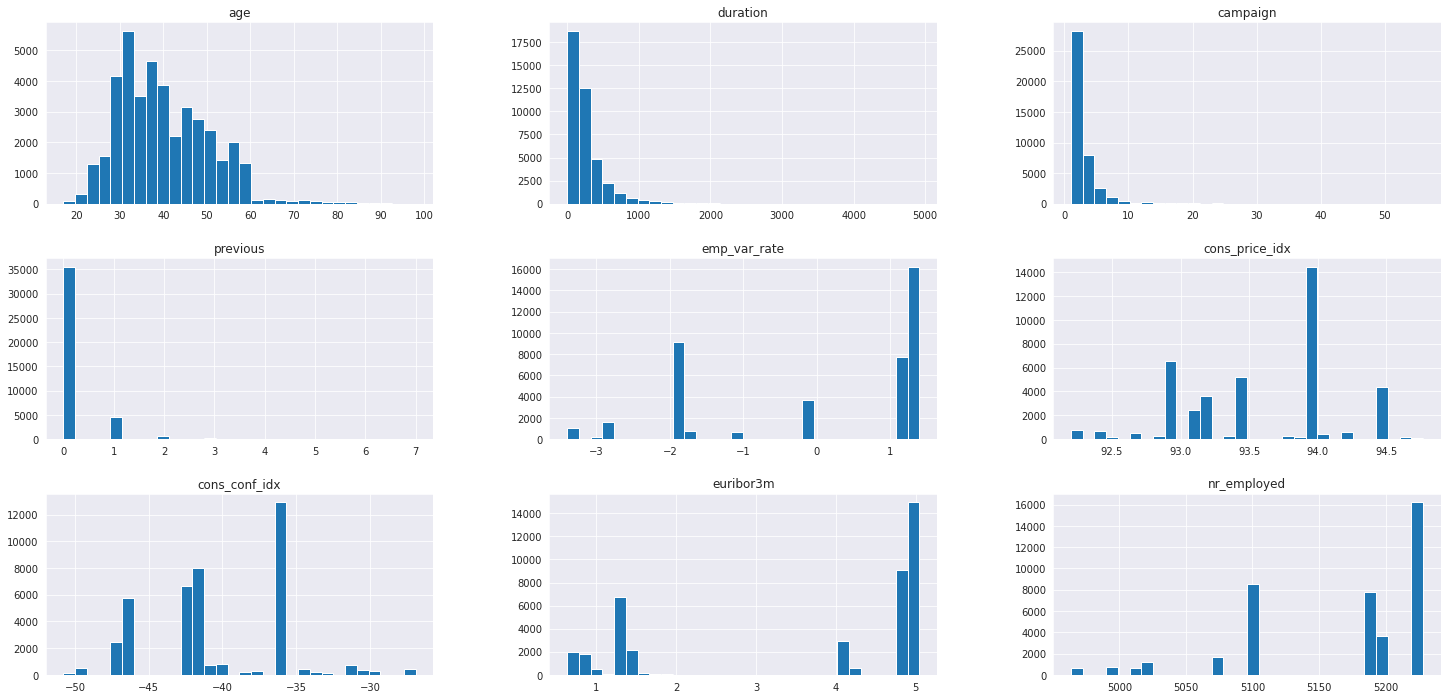

In [15]:
%matplotlib inline

banking_independent = banking.drop(columns = ['target', 'pdays'])
banking_independent.hist(bins = 30, figsize = (25,12))

In [16]:
def combo_chart(variable, title, width, length):
    dfcrosstab = pd.crosstab(banking[variable], banking.target)
    dfcrosstab[2] = dfcrosstab[0] + dfcrosstab[1]
    dfcrosstab[3] = dfcrosstab[1]/ dfcrosstab[2]
    
    sns.set_style('ticks')
    fig, ax1 = plt.subplots(figsize=(width,length))
    #plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    #plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
    ax1.set_title('Frequency & Takers %', fontsize = 18)
    ax1.set_xlabel(title, fontsize = 15)
    ax1.set_ylabel('Frequency', fontsize = 15)
    ax1 = sns.histplot(data=banking, x=variable, alpha = 0.95, color = 'RoyalBlue', label = 'Distribution')
    ax1.set_xticklabels(banking[variable], rotation = 30, size = 14, ha='right')
    ax2 = ax1.twinx()
    ax2.set_ylabel('%Takers', fontsize = 15)
    ax2 = sns.lineplot(data=dfcrosstab, x= list(dfcrosstab.index), y = 3, label = 'Positive Response Rate', color='red')
    plt.legend(loc='best')
    plt.show()

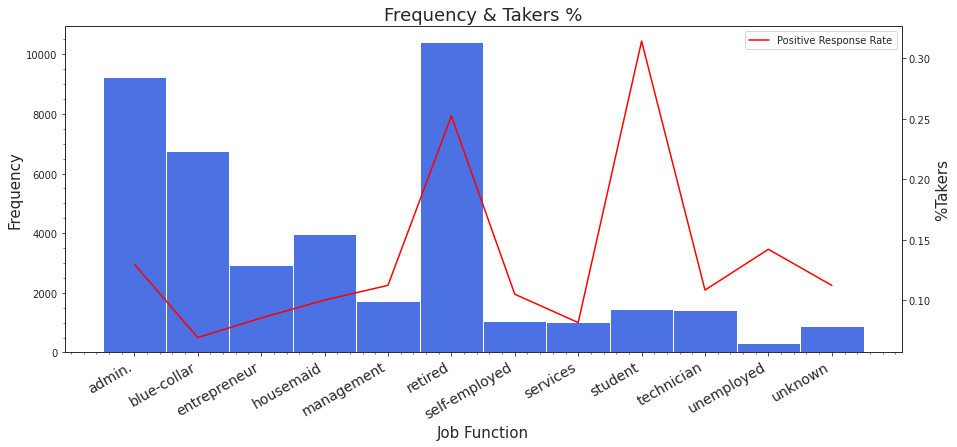

In [17]:
combo_chart('job', 'Job Function', 15, 6)

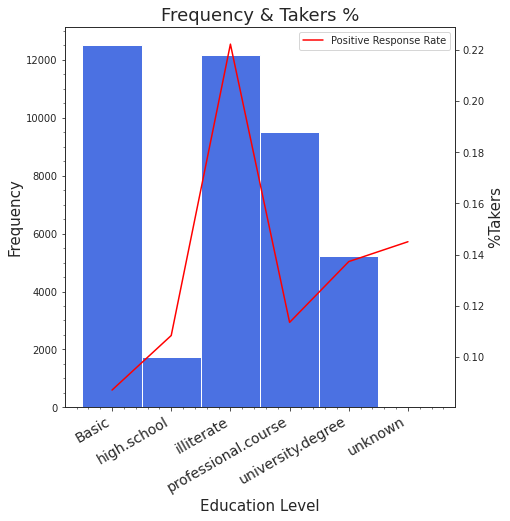

In [18]:
combo_chart('education', 'Education Level', 7, 7)

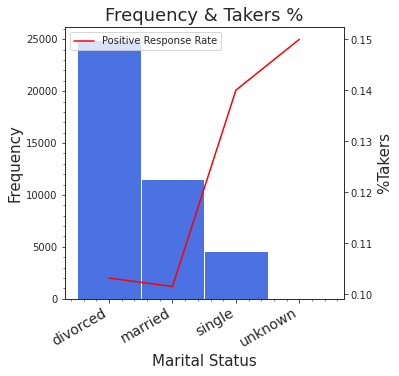

In [19]:
combo_chart('marital', 'Marital Status', 5, 5)

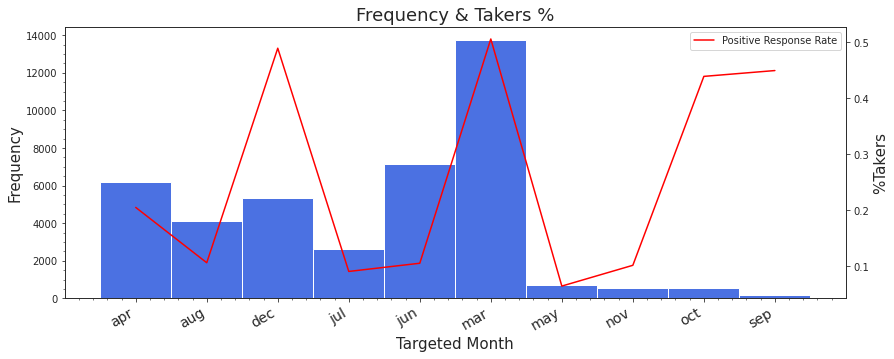

In [20]:
combo_chart('month', 'Targeted Month', 14, 5)

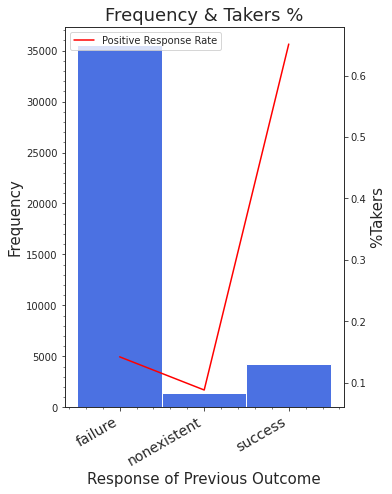

In [21]:
combo_chart('poutcome', 'Response of Previous Outcome', 5, 7)

#### CORRELATION MATRIX

In [ ]:
corr_matrix = banking.corr()
fig, ax1 = plt.subplots(figsize=(22,10))
ax1.set_title('Correlation  Matrix', fontsize = 18)
ax1 = sns.heatmap(data=corr_matrix, annot= True, cmap = 'BrBG')
ax1.set_xticklabels(labels = list(corr_matrix.columns), rotation = 45, size = 12)
ax1.set_yticklabels(labels = list(corr_matrix.columns), rotation = 0, size = 12)
plt.show()

- Duration, pdays, previous, emp_var_rate, euribor_3m & nr_employed all seems to have a good corelation with the target variable.   
- But, duration contains part of the dependant variable since it is zero for anyone who was not converted.   
- pdays & previous, nr_employed & previous, euribor_3m & previous all seems to be highly correlateed with one another as well

### Conversion of dummy variables 

In [23]:
# non-categorical columns
cat_cols = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = banking.columns.values.tolist()
non_cat_cols = [i for i in data_vars if i not in cat_cols]
banking_cat_cols = banking[cat_cols]
cat_dummies = pd.get_dummies(banking_cat_cols, drop_first = True, prefix_sep = '_')
banking_non_cat_cols = banking[non_cat_cols]
banking_final = pd.concat([banking_non_cat_cols, cat_dummies], axis = 1)

In [24]:
banking_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'target',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [25]:
pd.DataFrame(banking_final.dtypes).to_csv('datatypes1.csv')
# list_cols.to_csv("datatypes.csv")

In [26]:
from sklearn.model_selection import train_test_split
X = banking_final.drop(columns =['target', 'duration'])
y = banking_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Multi-collinearity checks

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['variables'] = X_train.columns
vif_data['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'vif', ascending = False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
30,housing_unknown,inf
32,loan_unknown,inf
8,nr_employed,8.152209e+04
5,cons_price_idx,6.439605e+04
7,euribor3m,7.854218e+02
6,cons_conf_idx,3.933721e+02
2,pdays,3.464321e+02
4,emp_var_rate,9.393465e+01
48,poutcome_nonexistent,3.736114e+01
0,age,2.615726e+01


In [28]:
X_train = X_train.drop(columns = ['housing_unknown', 'loan_unknown', 'nr_employed', 'euribor3m', 'cons_price_idx', 'cons_conf_idx', 'poutcome_nonexistent', 'age', 'pdays'])

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['variables'] = X_train.columns
vif_data['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'vif', ascending = False)

,variables,vif
19,marital_married,5.541534
32,month_may,5.041848
26,contact_telephone,3.686816
29,month_jul,3.454046
20,marital_single,3.227060
27,month_aug,3.111356
17,education_university.degree,2.966936
30,month_jun,2.893589
3,job_blue-collar,2.652377
2,emp_var_rate,2.471435


### Feature Selection
#### K-Best feature selection to take the top 15 features based on the F-scores

All features:
Index(['campaign', 'previous', 'emp_var_rate', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'default_unknown', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success'],
      dtype='object')
Selected best:
Index(['campaign', 'previous', 'emp_var_rate', 'job_blue-collar',
       'job_retired', 'job_student', 'marital_single', 'default_unknown',
       

Text(0, 0.5, 'F-Scores')

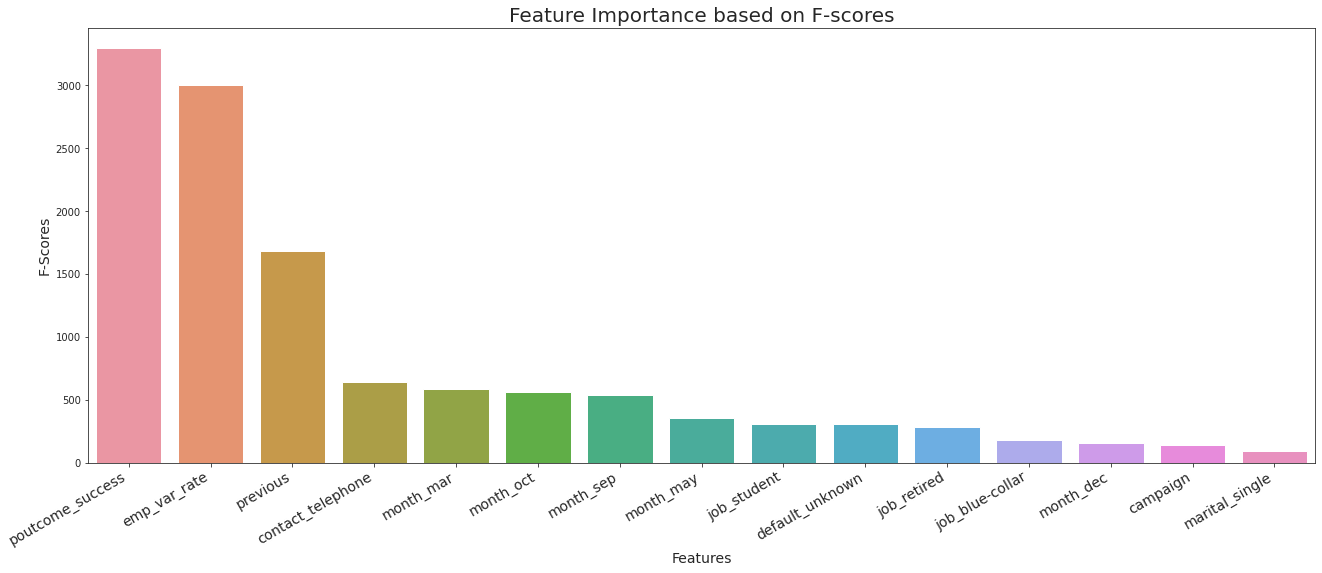

In [30]:
# Using SelectKbest to choose the top 15 most important variables 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

select = SelectKBest(score_func = f_classif, k = 15)

# apply feature selection
fit = select.fit(X_train,y_train)
X_selected = select.fit_transform(X_train, y_train)

filter = select.get_support()
features = X_train.columns
 
print("All features:")
print(features) 
print("Selected best:")
print(features[filter])

# visualizing the feature importance
fscores = pd.DataFrame(fit.scores_)
col_names = pd.DataFrame(features)
important_features = pd.concat([col_names, fscores], axis = 1)
important_features.columns = ['Features', 'Scores']
fig, axis = plt.subplots(figsize=(22,8))
sns.barplot(data = important_features.nlargest(15,'Scores'), x = 'Features', y = 'Scores')
plt.xticks(fontsize= 14, rotation =30, ha = 'right')
axis.set_title('Feature Importance based on F-scores', fontsize = 20)
axis.set_xlabel('Features', fontsize = 14)
axis.set_ylabel('F-Scores', fontsize = 14)

#### Recursive Feature Elimination using Logistic Regression as the core model

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_log = RFE(LogisticRegression(max_iter = 200), n_features_to_select = 20)
rfe_log.fit(X_train, y_train)

filter = rfe_log.get_support()
features = X_train.columns

print("All features:")
print(features) 
print("Selected best:")
print(features[filter])

All features:
Index(['campaign', 'previous', 'emp_var_rate', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'default_unknown', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_success'],
      dtype='object')
Selected best:
Index(['emp_var_rate', 'job_blue-collar', 'job_housemaid', 'job_retired',
       'job_services', 'job_student', 'education_illiterate',
       'mar

##### I will take a union of the features selected from KBest & RFE to input in the model

### Logistic Regression Model


In [32]:
# Combining the selected features 

Kbest_features = ['campaign', 'previous', 'emp_var_rate', 'job_blue-collar', 'job_retired', 'job_student', 'marital_single', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success']
RFE_features = ['emp_var_rate', 'job_blue-collar', 'job_housemaid', 'job_retired', 'job_services', 'job_student', 'education_illiterate',
       'marital_unknown', 'default_unknown', 'contact_telephone', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'poutcome_success']

combined_features = Kbest_features + RFE_features
final_features = list(set(combined_features))
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]
y_train_final = y_train
y_test_final = y_test
X_train_final.shape

(30891, 23)

In [33]:
# Implementing the logistic regression model

import statsmodels.api as sm
logit_model = sm.Logit(y_train_final,X_train_final)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.311148
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.119     
Dependent Variable:   target            AIC:               19269.3237
Date:                 2021-11-19 02:46  BIC:               19461.1027
No. Observations:     30891             Log-Likelihood:    -9611.7   
Df Model:             22                LL-Null:           -10914.   
Df Residuals:         30868             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
contact_telephone    -0.4849   0.0584  -8.3068 0.0000 -0.5993 -0.3705
marital_single  

##### Variables education_illiterate, marital_unknown & job_retired have high p-values, so let's run it again without these

In [34]:
X_train_final = X_train_final.drop(columns = ['education_illiterate', 'marital_unknown', 'job_retired'])
X_test_final = X_test_final.drop(columns = ['education_illiterate', 'marital_unknown', 'job_retired']) 
import statsmodels.api as sm
logit_model = sm.Logit(y_train_final,X_train_final)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.311182
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.119     
Dependent Variable:  target           AIC:              19265.4160
Date:                2021-11-19 02:46 BIC:              19432.1804
No. Observations:    30891            Log-Likelihood:   -9612.7   
Df Model:            19               LL-Null:          -10914.   
Df Residuals:        30871            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
contact_telephone -0.4895   0.0583  -8.4003 0.0000 -0.6037 -0.3753
marital_single    -0.4465   0.0425 -10.5084 0.0000 -0

#### Validation and Results

In [35]:
# Fitting final features in the training data & reporting K-folds validation scores
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from numpy import mean
from numpy import std

LogReg = LogisticRegression(max_iter = 200)
LogReg.fit(X_train_final, y_train_final)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(LogReg, X_train_final, y_train_final, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy on K-folds validation on train set: %.3f (%.3f)' % (mean(scores), std(scores)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test_final, y_test_final)))

Accuracy on K-folds validation on train set: 0.897 (0.003)
Accuracy of logistic regression classifier on test set: 0.90


##### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(X_test_final)
confusion_matrix = confusion_matrix(y_test_final, y_pred)
print(confusion_matrix)

[[9074   82]
 [ 932  209]]


##### Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.72      0.18      0.29      1141

    accuracy                           0.90     10297
   macro avg       0.81      0.59      0.62     10297
weighted avg       0.89      0.90      0.87     10297



##### ROC Curve

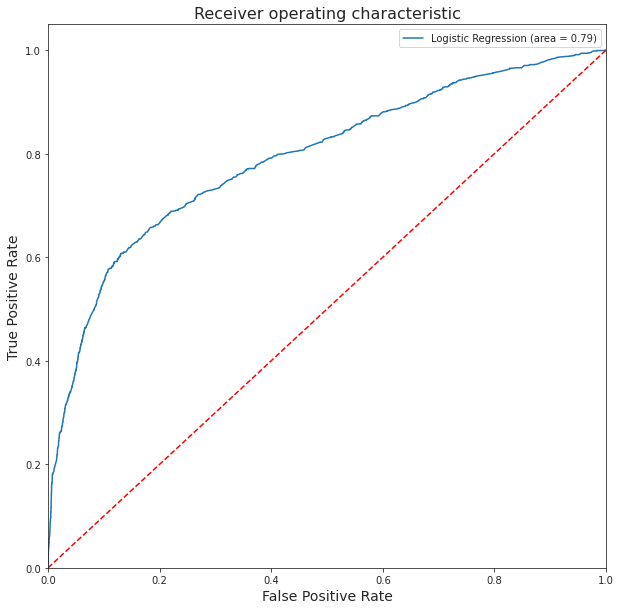

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_final, LogReg.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test_final, LogReg.predict_proba(X_test_final)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

- Although we had a high accuracy of predictions in the test set, it is not representative of the model power since the sample is not evenly populated across the two target classes.  
- One way to account for this inbalance is to use SMOTE (Severity Minority Oversampling) technique to create artifically tweaked copies of 'positive responses' to even the distribution.  
- Another way is to look at the ROC curve, which shows that the AUC is just 0.79
- We will be exploring other models to improve on our Logit Model scores

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Start with the default Random Forest

Rf_model = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')
Rf_model.fit(X_train_final, y_train_final)

# Create the K-folds objects with 10 splits & 5 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(Rf_model, X_train_final, y_train_final, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy on K-folds validation on train set: %.3f (%.3f)' % (mean(scores), std(scores)))
print('The accuracy of the Random Forest Classifier on the test set is {:.2f}'.format(Rf_model.score(X_test_final, y_test_final)))

Accuracy on K-folds validation on train set: 0.889 (0.004)
The accuracy of the Random Forest Classifier on the test set is 0.90


In [40]:
n_nodes = []
max_depths = []

for ind_tree in Rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 3912
Average maximum depth 26


Text(0.5, 0, 'Features')

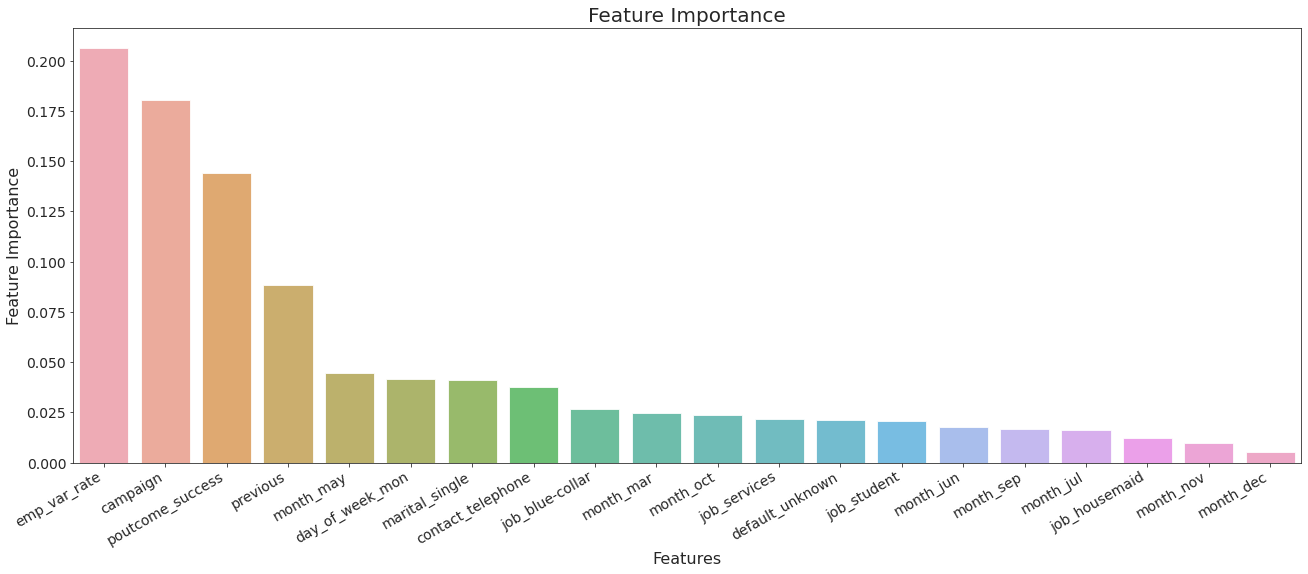

In [41]:
feature_importance  =  pd.DataFrame({'features': list(X_train_final.columns), 'importance': Rf_model.feature_importances_}).sort_values(by = 'importance', ascending = False)

fig, ax = plt.subplots(figsize = (22,8))
ax = sns.barplot(data = feature_importance, x = 'features', y = 'importance', alpha = 0.8)
plt.xticks(ha = 'right', fontsize = 14, rotation = 30)
plt.yticks(fontsize = 14)
ax.set_title('Feature Importance', fontsize = 20)
ax.set_ylabel('Feature Importance', fontsize = 16)
ax.set_xlabel('Features', fontsize = 16)

##### ROC Curve

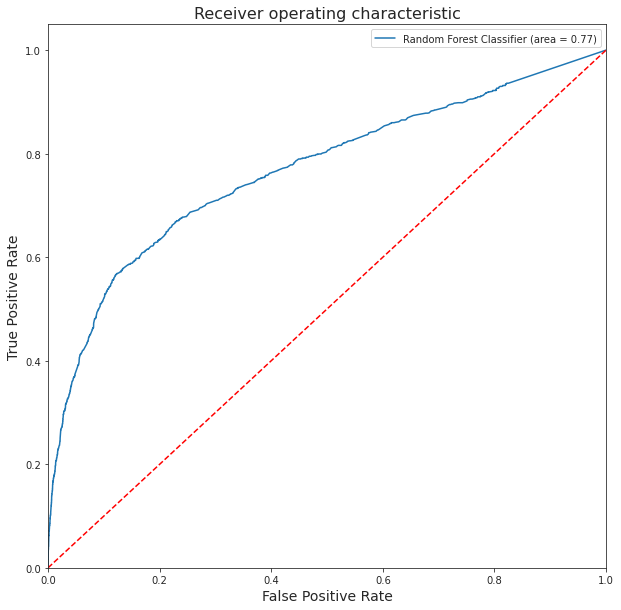

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test_final, Rf_model.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test_final, Rf_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

### Random Forest Hyperparameter tuning 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(100, 1000, 50).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 5).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 11)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, scoring = 'roc_auc', cv = 3, n_iter = 10, verbose = 1, random_state=11)

# Fit 
rs.fit(X_train_final, y_train_final)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=11),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50],
                                        'min_samples

In [44]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 0.8999999999999999,
 'max_leaf_nodes': 40,
 'min_samples_split': 5,
 'n_estimators': 302}

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Start with the default Random Forest

Rf_best_model = RandomForestClassifier(n_estimators = 302, bootstrap = True, min_samples_split = 5, max_features = 0.8999999999999999, max_depth =19, max_leaf_nodes = 40)
Rf_best_model.fit(X_train_final, y_train_final)

# Create the K-folds objects with 10 splits & 5 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)
# evaluate model
scores = cross_val_score(Rf_best_model, X_train_final, y_train_final, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy on K-folds validation on train set: %.3f (%.3f)' % (mean(scores), std(scores)))
print('The accuracy of the Random Forest Classifier on the test set is {:.2f}'.format(Rf_best_model.score(X_test_final, y_test_final)))

Accuracy on K-folds validation on train set: 0.899 (0.003)
The accuracy of the Random Forest Classifier on the test set is 0.90


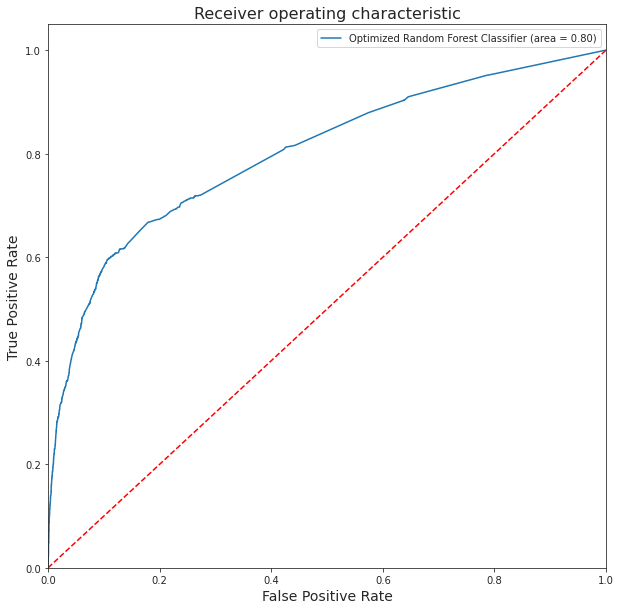

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test_final, Rf_best_model.predict_proba(X_test_final)[:,1])
fpr, tpr, thresholds = roc_curve(y_test_final, Rf_best_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, label='Optimized Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver operating characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

In [49]:
X_train_final.shape

(30891, 20)

In [57]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model layers
model = Sequential()
model.add(Dense(20, input_dim = 20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(X_train_final, y_train_final, epochs = 100, batch_size = 300)

Epoch 1/100
103/103 [==============================] - 1s 3ms/step - loss: 0.4511 - accuracy: 0.8026
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8936
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8963
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8974
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.8970
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8974
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8976
Epoch 8/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8977
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8975
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2794 - accura

In [60]:
loss, accuracy = model.evaluate(X_train_final, y_train_final)
print('Accuracy: %.2f' % (accuracy*100))

966/966 [==============================] - 2s 2ms/step - loss: 0.2689 - accuracy: 0.9025
Accuracy: 90.25


In [61]:
loss, accuracy = model.evaluate(X_test_final, y_test_final)
print('Accuracy: %.2f' % (accuracy*100))

322/322 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.9028
Accuracy: 90.28
